In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
full_angle_recon = np.load('full_angle_ic_1600_recons_10_weight_0_clip_True.npy')[:, -1, 0, 11:-11, 11:-11]

offset = 50

FBP = []
iterative_sparse_recon = []
iterative_sparse_TV_recon = []

for photon in tqdm([32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 
                    320, 400, 500, 640, 800, 1000, 1280, 1600, 2000]):
    
    temp = np.load('./FBP_results/FDK-ic-1600-test-photon-' + str(photon) + '-offset-' + str(offset) + '.npy')[:, 11:-11, 11:-11]
    FBP.append(temp)
    
    temp = np.load('./iterative_results/iterative_sparse_photon_' + str(photon) + '_offset_' + str(offset) + '_weight_0_clip_True.npy')[:, -1, 0, 11:-11, 11:-11]
    iterative_sparse_recon.append(temp)
    
    temp = np.load('./iterative_results/iterative_sparse_photon_' + str(photon) + '_offset_' + str(offset) + '_weight_2_clip_True.npy')[:, -1, 0, 11:-11, 11:-11]
    iterative_sparse_TV_recon.append(temp)
    
FBP = (np.concatenate(FBP, axis=0))
iterative_sparse_recon = (np.concatenate(iterative_sparse_recon, axis=0))
iterative_sparse_TV_recon = (np.concatenate(iterative_sparse_TV_recon, axis=0))

FBP_UNet0 = np.load('./FBP_UNet_results/FBP_UNets_model_0_offset_' + str(offset) + '_poisson_32to2000.npy')[:, :, :, 0]

#iter0 = np.load('./FBP_UNet_results/starting_iter_0_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter5 = np.load('./FBP_UNet_results/starting_iter_5_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter10 = np.load('./FBP_UNet_results/starting_iter_10_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter15 = np.load('./FBP_UNet_results/starting_iter_15_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter20 = np.load('./FBP_UNet_results/starting_iter_20_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter25 = np.load('./FBP_UNet_results/starting_iter_25_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter30 = np.load('./FBP_UNet_results/starting_iter_30_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter40 = np.load('./FBP_UNet_results/starting_iter_40_UNets_model_0_offset_' + str(offset) + '_weight_0_clip_True_poisson_32to2000.npy')[:, :, :, 0]

#iter0_TV = np.load('./FBP_UNet_results/starting_iter_0_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter5_TV = np.load('./FBP_UNet_results/starting_iter_5_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter10_TV = np.load('./FBP_UNet_results/starting_iter_10_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter15_TV = np.load('./FBP_UNet_results/starting_iter_15_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter20_TV = np.load('./FBP_UNet_results/starting_iter_20_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter25_TV = np.load('./FBP_UNet_results/starting_iter_25_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter30_TV = np.load('./FBP_UNet_results/starting_iter_30_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]
iter40_TV = np.load('./FBP_UNet_results/starting_iter_40_UNets_model_0_offset_' + str(offset) + '_weight_2_clip_True_poisson_32to2000.npy')[:, :, :, 0]

100%|██████████| 19/19 [00:14<00:00,  1.33it/s]


In [3]:
def compare_pcc(im_true, im_test):
    
    fsp = im_true - np.mean(im_true)
    fst = im_test - np.mean(im_test)
        
    devP = np.std(im_true)
    devT = np.std(im_test)
    
    #print(np.shape(fsp), devP)
    
    loss = np.mean(fsp * fst) / \
          np.clip(devP * devT, a_min=1e-10, a_max=None)
    #loss = np.mean(np.square(im_true - im_test))
    return loss

FBP_pcc = []
iterative_sparse_recon_pcc = []
iterative_sparse_TV_recon_pcc =[]

FBP_UNet0_pcc = []

iter5_pcc = []
iter10_pcc = []
iter15_pcc = []
iter20_pcc = []
iter25_pcc = []
iter30_pcc = []
iter40_pcc = []

iter5_TV_pcc = []
iter10_TV_pcc = []
iter15_TV_pcc = []
iter20_TV_pcc = []
iter25_TV_pcc = []
iter30_TV_pcc = []
iter40_TV_pcc = []

for idx, photon in tqdm(enumerate([32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 320, 400, 500, 640, 800, 1000, 1280, 1600, 2000])):

    data_temp = FBP[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    FBP_pcc.append(pcc)
    
    data_temp = iterative_sparse_recon[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iterative_sparse_recon_pcc.append(pcc)
    
    data_temp = iterative_sparse_TV_recon[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iterative_sparse_TV_recon_pcc.append(pcc)
    
    data_temp = FBP_UNet0[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    FBP_UNet0_pcc.append(pcc)
    
    data_temp = iter5[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter5_pcc.append(pcc)
    
    data_temp = iter10[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter10_pcc.append(pcc)
    
    data_temp = iter15[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter15_pcc.append(pcc)
    
    data_temp = iter20[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter20_pcc.append(pcc)
    
    data_temp = iter25[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter25_pcc.append(pcc)
    
    data_temp = iter30[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter30_pcc.append(pcc)
    
    data_temp = iter40[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter40_pcc.append(pcc)
    
    data_temp = iter5_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter5_TV_pcc.append(pcc)
    
    data_temp = iter10_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter10_TV_pcc.append(pcc)
    
    data_temp = iter15_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter15_TV_pcc.append(pcc)
    
    data_temp = iter20_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter20_TV_pcc.append(pcc)
    
    data_temp = iter25_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter25_TV_pcc.append(pcc)
    
    data_temp = iter30_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter30_TV_pcc.append(pcc)
    
    data_temp = iter40_TV[1000*idx:1000*idx+1000]
    pcc = compare_pcc(full_angle_recon, data_temp)
    iter40_TV_pcc.append(pcc)

19it [01:03,  3.34s/it]


findfont: Font family ['Mishafi'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Mishafi'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Mishafi'] not found. Falling back to DejaVu Sans.


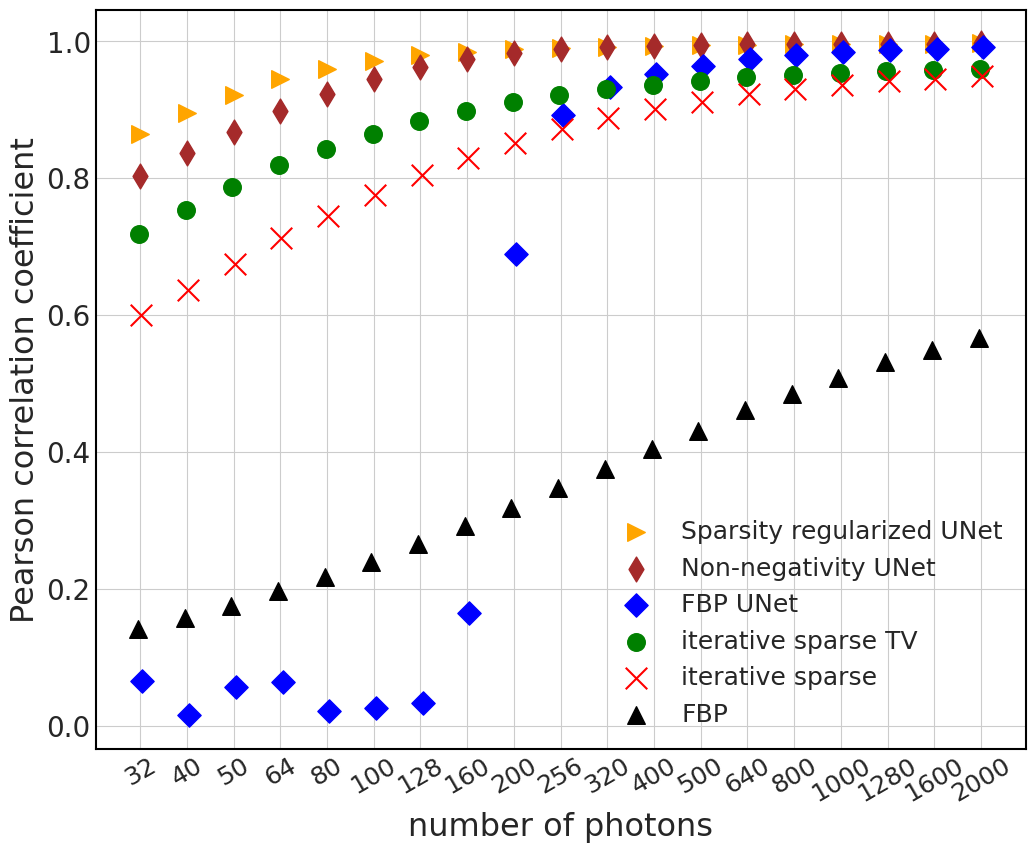

In [4]:
plt.rcParams['figure.figsize'] = [10*1.2, 8*1.2]
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Mishafi"
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': 'Times New Roman',  # 'Nimbus Roman No9 L',
# })

markersize = 160

fig, ax = plt.subplots()

plt.scatter(np.arange(19), iter30_TV_pcc, marker='>', s=markersize, color='orange', label="Sparsity regularized UNet")
plt.scatter(np.arange(19), iter30_pcc, marker='d', s=markersize, color='brown', label="Non-negativity UNet")
plt.scatter(np.arange(19)+0.05, FBP_UNet0_pcc, marker='D', s=markersize-20, color='blue', label="FBP UNet")
plt.scatter(np.arange(19)-0.025, iterative_sparse_TV_recon_pcc, marker='o', s=markersize, color='green', label="iterative sparse TV")
plt.scatter(np.arange(19)+0.025, iterative_sparse_recon_pcc, marker='x', s=markersize+80, color='red', label="iterative sparse")
plt.scatter(np.arange(19)-0.05, FBP_pcc, marker='^', color='black', s=markersize, label="FBP")

plt.legend(fontsize=18, loc='lower right')
plt.xlabel("number of photons", fontsize=23)
plt.ylabel("Pearson correlation coefficient", fontsize=23)
plt.xticks(np.arange(19), [32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 320, 400, 500, 640, 800, 1000, 1280, 1600, 2000], rotation=30, fontsize=18)
plt.yticks(fontsize=20)
#plt.ticklabel_format(axis='y', scilimits=(-1, 1), style='sci')
ax.yaxis.offsetText.set_fontsize(20)
#plt.ylim(0.895, 1.003)
plt.show()

findfont: Font family ['Mishafi'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Mishafi'] not found. Falling back to DejaVu Sans.


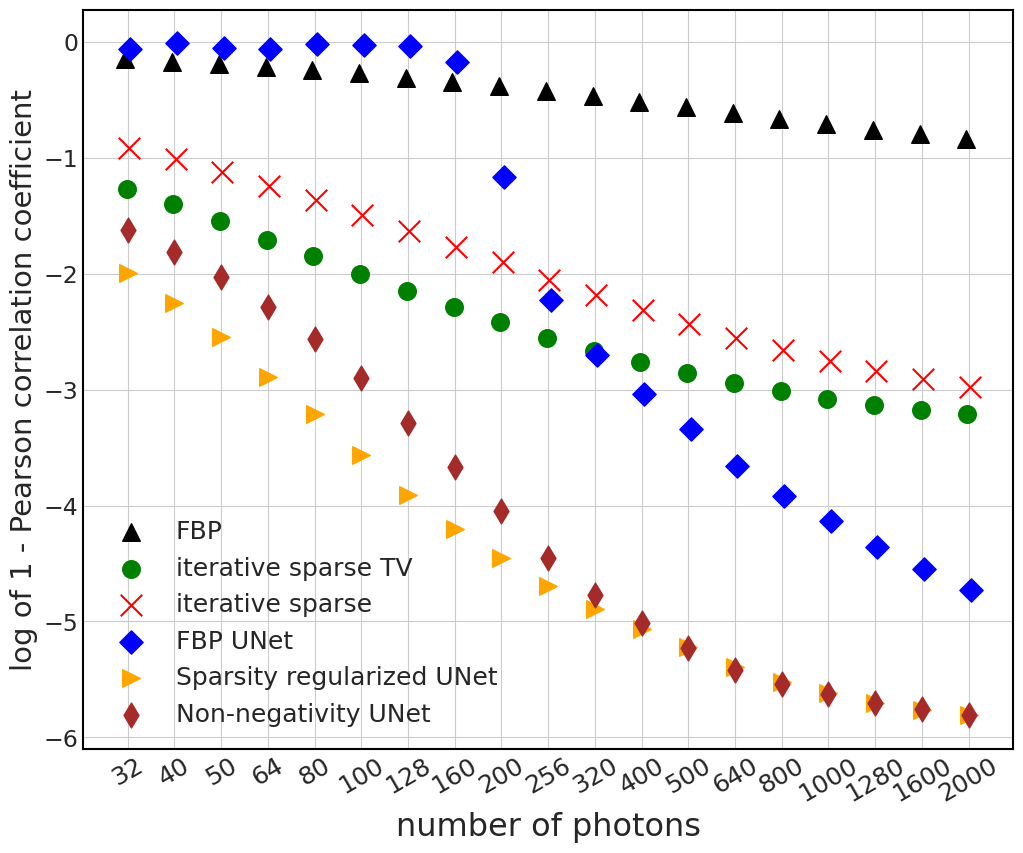

In [5]:
plt.rcParams['figure.figsize'] = [10*1.2, 8*1.2]
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Mishafi"
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': 'Times New Roman',  # 'Nimbus Roman No9 L',
# })

markersize = 160

fig, ax = plt.subplots()

plt.scatter(np.arange(19)-0.05,[np.log(1-ele) for ele in FBP_pcc], marker='^', color='black', s=markersize, label="FBP")
plt.scatter(np.arange(19)-0.025, [np.log(1-ele) for ele in iterative_sparse_TV_recon_pcc], marker='o', s=markersize, color='green', label="iterative sparse TV")
plt.scatter(np.arange(19)+0.025, [np.log(1-ele) for ele in iterative_sparse_recon_pcc], marker='x', s=markersize+80, color='red', label="iterative sparse")
plt.scatter(np.arange(19)+0.05, [np.log(1-ele) for ele in FBP_UNet0_pcc], marker='D', s=markersize-20, color='blue', label="FBP UNet")
plt.scatter(np.arange(19), [np.log(1-ele) for ele in iter30_TV_pcc], marker='>', s=markersize, color='orange', label="Sparsity regularized UNet")
plt.scatter(np.arange(19), [np.log(1-ele) for ele in iter30_pcc], marker='d', s=markersize, color='brown', label="Non-negativity UNet")

plt.legend(fontsize=18, loc='lower left')
plt.xlabel("number of photons", fontsize=23)
plt.ylabel("log of 1 - Pearson correlation coefficient", fontsize=21)
plt.xticks(np.arange(19), [32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 320, 400, 500, 640, 800, 1000, 1280, 1600, 2000], rotation=30, fontsize=18)
plt.yticks(fontsize=17)
#plt.ticklabel_format(axis='y', scilimits=(-1, 1), style='sci')
ax.yaxis.offsetText.set_fontsize(20)
#plt.ylim(0.895, 1.003)
plt.show()

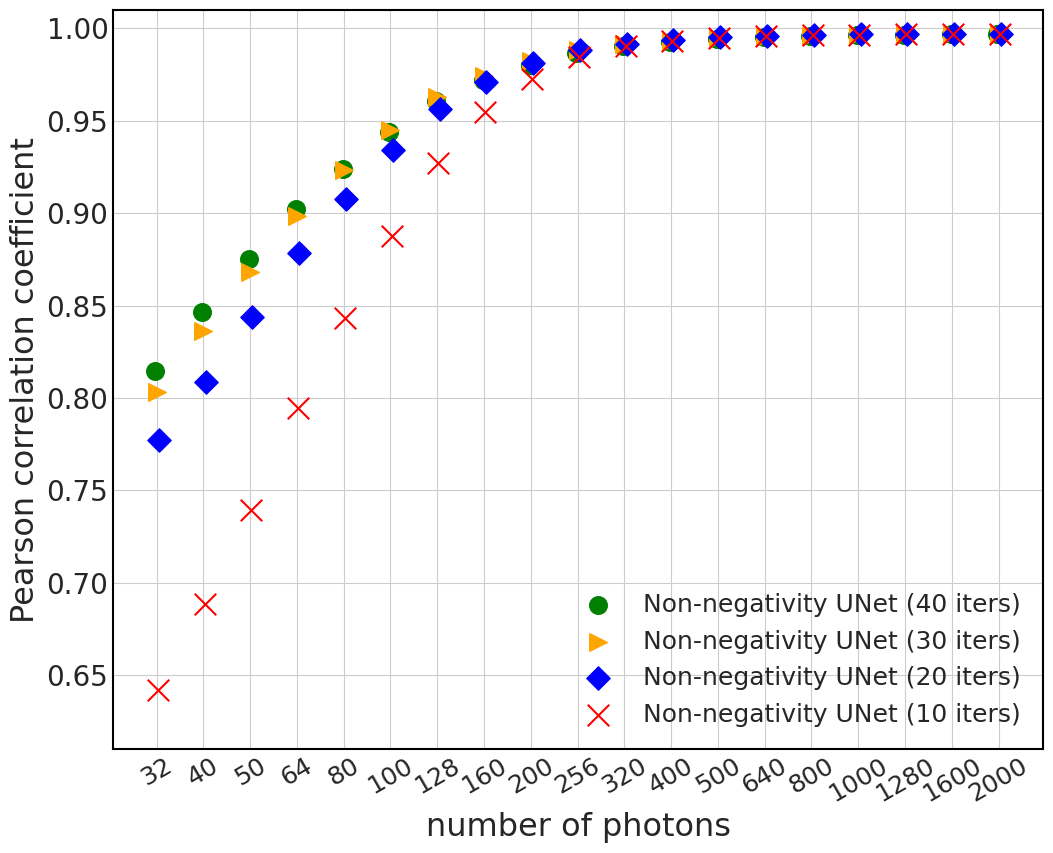

In [6]:
plt.rcParams['figure.figsize'] = [10*1.2, 8*1.2]
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Mishafi"
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': 'Times New Roman',  # 'Nimbus Roman No9 L',
# })

markersize = 160

fig, ax = plt.subplots()

plt.scatter(np.arange(19)-0.025, iter40_pcc, marker='o', s=markersize, color='green', label="Non-negativity UNet (40 iters)")
plt.scatter(np.arange(19), iter30_pcc, marker='>', s=markersize, color='orange', label="Non-negativity UNet (30 iters)")
#plt.scatter(np.arange(19), iter25_pcc, marker='d', s=markersize, color='brown', label="Non-negativity UNet (25 iters)")
plt.scatter(np.arange(19)+0.05, iter20_pcc, marker='D', s=markersize-20, color='blue', label="Non-negativity UNet (20 iters)")
#plt.scatter(np.arange(19)-0.025, iter15_pcc, marker='o', s=markersize, color='green', label="Non-negativity UNet (15 iters)")
plt.scatter(np.arange(19)+0.025, iter10_pcc, marker='x', s=markersize+80, color='red', label="Non-negativity UNet (10 iters)")
#plt.scatter(np.arange(19)-0.05, iter5_pcc, marker='^', color='black', s=markersize, label="Non-negativity UNet (5 iters)")

plt.legend(fontsize=18, loc='lower right')
plt.xlabel("number of photons", fontsize=23)
plt.ylabel("Pearson correlation coefficient", fontsize=23)
plt.xticks(np.arange(19), [32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 320, 400, 500, 640, 800, 1000, 1280, 1600, 2000], rotation=30, fontsize=18)
plt.yticks(fontsize=20)
#plt.ticklabel_format(axis='y', scilimits=(-1, 1), style='sci')
ax.yaxis.offsetText.set_fontsize(20)
plt.ylim(0.61, 1.01)
plt.show()

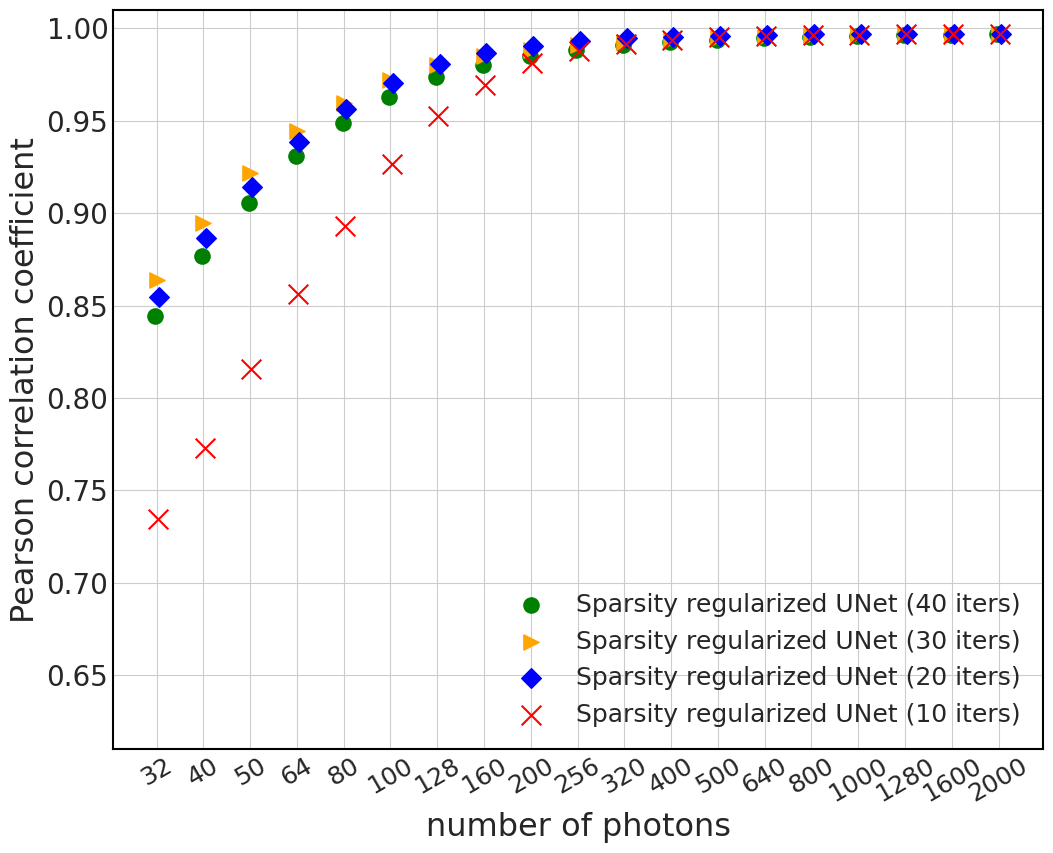

In [7]:
plt.rcParams['figure.figsize'] = [10*1.2, 8*1.2]
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Mishafi"
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# plt.rcParams.update({
#     'font.family': 'serif',
#     'font.serif': 'Times New Roman',  # 'Nimbus Roman No9 L',
# })

markersize = 120

fig, ax = plt.subplots()

plt.scatter(np.arange(19)-0.025, iter40_TV_pcc, marker='o', s=markersize, color='green', label="Sparsity regularized UNet (40 iters)")
plt.scatter(np.arange(19), iter30_TV_pcc, marker='>', s=markersize, color='orange', label="Sparsity regularized UNet (30 iters)")
#plt.scatter(np.arange(19), iter25_TV_pcc, marker='d', s=markersize, color='brown', label="Sparsity regularized UNet (25 iters)")
plt.scatter(np.arange(19)+0.05, iter20_TV_pcc, marker='D', s=markersize-20, color='blue', label="Sparsity regularized UNet (20 iters)")
#plt.scatter(np.arange(19)-0.025, iter15_TV_pcc, marker='o', s=markersize, color='green', label="Sparsity regularized UNet (15 iters)")
plt.scatter(np.arange(19)+0.025, iter10_TV_pcc, marker='x', s=markersize+80, color='red', label="Sparsity regularized UNet (10 iters)")
#plt.scatter(np.arange(19)-0.05, iter5_TV_pcc, marker='^', color='black', s=markersize, label="Sparsity regularized UNet (5 iters)")

plt.legend(fontsize=18, loc='lower right')
plt.xlabel("number of photons", fontsize=23)
plt.ylabel("Pearson correlation coefficient", fontsize=23)
plt.xticks(np.arange(19), [32, 40, 50, 64, 80, 100, 128, 160, 200, 256, 320, 400, 500, 640, 800, 1000, 1280, 1600, 2000], rotation=30, fontsize=18)
plt.yticks(fontsize=20)
#plt.ticklabel_format(axis='y', scilimits=(-1, 1), style='sci')
ax.yaxis.offsetText.set_fontsize(20)
plt.ylim(0.61, 1.01)
plt.show()